In [32]:
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
import pandas as pd
from matplotlib.animation import FuncAnimation
import geopandas as gpd
import threedigrid
from threedigrid.admin.gridresultadmin import GridH5ResultAdmin
from threedigrid.admin.gridadmin import GridH5Admin

import uuid

In [33]:
from __my_functions_flooddepth_houses import get_time_dimensions_flood
from __my_functions_flooddepth_houses import create_df_flooddepth_houses
from __my_functions_flooddepth_houses import create_sample_houses_withinZone
from __my_functions_flooddepth_houses import calculate_first_qth_arrival_and_maxdepth
from __my_functions_flooddepth_houses import plot_flooddepth_houses_in_zone

-----------

### paths

In [57]:
## flood results paths
# floodresults_path = '/Users/louiseklingen/Documents/TU/modelresults/modelresults_denhelder' 
floodresults_path = 'E:/projecten/P2019_1_DenHelderOverstroming/data_en_modellen/modelresults' 

In [58]:
general_path = 'E:\paper2_analysis/depth_arrival_zones'
figures_path = f'{general_path}/figures'
input_path = f'{general_path}/input'
output_path = f'{general_path}/output'

-----------------------------------

### laod result 

In [98]:
# scenario_name = 'scen2_napiek'
nr_zones_sampling = 90


scenario_name = 'scen1_voorpiek'
simulation_name = 'lk_dh_test13_5verloop_2d'
## start_breach_time = '2000-01-01T18:00:00'
start_breach_time = '2000-01-01T00:00:00'


# scenario_name = 'scen2_napiek'
# simulation_name = 'lk_dh_test14_5verloop_38h'
# # start_breach_time = '2000-01-02T04:00:00'
# start_breach_time = '2000-01-01T00:00:00'

In [99]:
zones_maxdepth_arrival_df = gpd.read_file(f'{output_path}/zones_maxdepth_arrival_df_{scenario_name}_{nr_zones_sampling}.geojson')
zones_maxdepth_arrival_df.head(2)

,BU_NAAM,AANT_INW,maxdepth,arrival,geometry
0,Golfstroombuurt,710,2.901366,2000-01-01 00:30:03,"POLYGON ((111634.398 551496.875, 111642.898 55..."
1,Oudesluis (woonkern),510,0.137071,2000-01-01 00:00:31,"POLYGON ((115877.790 539067.932, 115883.770 53..."


In [100]:
## flood result files
netcdf_file = (f'{floodresults_path}/{simulation_name}/results_3di.nc')
gridadmin_file = (f'{floodresults_path}/{simulation_name}/gridadmin.h5')
gr = GridH5ResultAdmin(gridadmin_file , netcdf_file)
ga = GridH5Admin(gridadmin_file)
time_humanized, last_timestamp  = get_time_dimensions_flood(gr, start_breach_time)

rekentijd: 48.00278541015558 uur
aantal tijdstappen: 577
interval: 300.05, secondes = 5.0 min
 breach start time at: 2000-01-01 00:00:00


------------

<AxesSubplot:>

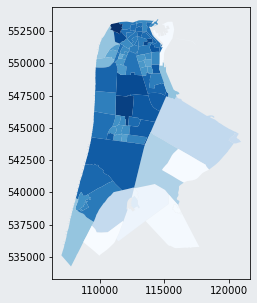

In [101]:
fig = plt.figure(figsize=(20, 5),facecolor='#e9ecef')
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('#e9ecef')


# zones_maxdepth_arrival_df.plot(ax=ax, column = 'arrival', cmap= 'YlOrRd_r')
zones_maxdepth_arrival_df.plot(ax=ax, column = 'maxdepth', cmap= 'Blues')


## drop nan values

In [102]:
zones_maxdepth_arrival_df_dropna = zones_maxdepth_arrival_df.dropna()

In [103]:
type(zones_maxdepth_arrival_df_dropna.arrival[10])

str

In [104]:
time_humanized[80]

datetime.datetime(2000, 1, 1, 6, 40)

### change time to minutes

In [129]:
zones_maxdepth_arrival_df_dropna.head(2)

,BU_NAAM,AANT_INW,maxdepth,arrival,geometry
0,Golfstroombuurt,710,2.901366,2000-01-01 00:30:03,"POLYGON ((111634.398 551496.875, 111642.898 55..."
1,Oudesluis (woonkern),510,0.137071,2000-01-01 00:00:31,"POLYGON ((115877.790 539067.932, 115883.770 53..."


### change dolor for depth and arrival

In [126]:
#filter on depth
depth_threshold = 2.5
zones_maxdepth_threshold = zones_maxdepth_arrival_df_dropna[zones_maxdepth_arrival_df_dropna.maxdepth > depth_threshold]


## filter on arrival 
## arrival min = 30 min
## arrival max = 120 min

In [127]:
zones_maxdepth_threshold.head(2)

,BU_NAAM,AANT_INW,maxdepth,arrival,geometry
0,Golfstroombuurt,710,2.901366,2000-01-01 00:30:03,"POLYGON ((111634.398 551496.875, 111642.898 55..."
5,Friesebuurt,90,3.091869,2000-01-01 01:45:03,"POLYGON ((113675.500 549295.500, 113784.000 54..."


In [136]:
zones_maxdepth_threshold.AANT_INW.sum()

35700

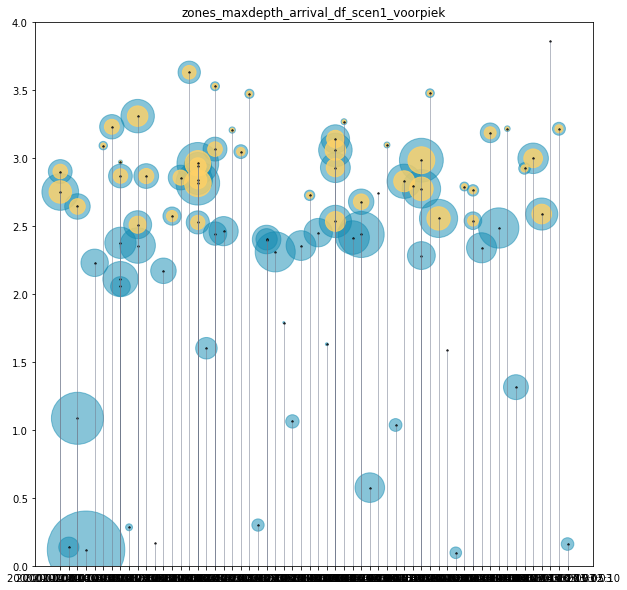

In [142]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(1, 2, 2)

df = zones_maxdepth_arrival_df_dropna.copy()
df_tr = zones_maxdepth_threshold.copy()


ax1.vlines(df.arrival, 0, df.maxdepth, linewidth= 1, color = '#70798c', alpha=0.5)
ax1.scatter(df.arrival, df.maxdepth,s = df.AANT_INW*0.8, alpha= 0.5, color = '#118ab2' )
ax1.scatter(df_tr.arrival, df_tr.maxdepth,s = df_tr.AANT_INW*0.3, alpha=0.8 , color= '#ffd166')

ax1.scatter(df.arrival, df.maxdepth,s = 1.7, alpha=1, c ='k' )

ax1.set_ylim(0,4)
ax1.set_title(f'zones_maxdepth_arrival_df_{scenario_name}') 


# ax1.set_ylim(0,4)
# print(df_tr.AANT_INW.sum())



plt.savefig(f'{figures_path}/zones_maxdepth_arrival_df_{scenario_name}_{nr_zones_sampling}_temp.png', dpi=300)  
# plt.savefig(f'{figures_path}/zones_maxdepth_arrival_df_{scenario_name}_{nr_zones_sampling}.svg', dpi=300)  

In [111]:
zones_maxdepth_arrival_df_dropna_threshold = zones_maxdepth_arrival_df_dropna.maxdepth[zones_maxdepth_arrival_df_dropna.maxdepth > depth_threshold]a